# Explore here

In [4]:
import os
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()
client_id=os.getenv('CLIENT_ID')
client_secret=os.getenv('CLIENT_SECRET')


In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
con = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))

In [7]:
artist_id='2LRoIwlKmHjgvigdNGBHNo'

response=con.artist_top_tracks(artist_id)
print(response)

{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2LRoIwlKmHjgvigdNGBHNo'}, 'href': 'https://api.spotify.com/v1/artists/2LRoIwlKmHjgvigdNGBHNo', 'id': '2LRoIwlKmHjgvigdNGBHNo', 'name': 'Feid', 'type': 'artist', 'uri': 'spotify:artist:2LRoIwlKmHjgvigdNGBHNo'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV', 'CW'

In [22]:
if response:
    tracks = response['tracks']

print(tracks[0]['artists'][0]['name'])

tracks1 = [{k:(v/(1000*60)%60) if k == 'duration_ms' else v for k,v in track.items() if k in ['name', 'popularity','duration_ms']} for track in tracks]

print(tracks1)

Feid
[{'duration_ms': 3.28, 'name': 'LUNA', 'popularity': 88}, {'duration_ms': 2.7127833333333333, 'name': 'PERRO NEGRO', 'popularity': 85}, {'duration_ms': 4.968833333333333, 'name': '+57', 'popularity': 84}, {'duration_ms': 3.7562166666666665, 'name': 'SE ME OLVIDA', 'popularity': 82}, {'duration_ms': 2.5993333333333335, 'name': 'Feliz Cumpleaños Ferxxo', 'popularity': 81}, {'duration_ms': 3.2597666666666667, 'name': 'CLASSY 101', 'popularity': 78}, {'duration_ms': 3.4624333333333333, 'name': 'SORRY 4 THAT MUCH', 'popularity': 80}, {'duration_ms': 2.8646666666666665, 'name': 'Normal', 'popularity': 78}, {'duration_ms': 3.59185, 'name': 'Revolú', 'popularity': 77}, {'duration_ms': 3.36955, 'name': 'LA INOCENTE', 'popularity': 77}]


In [24]:
tracks2=[]
for track in tracks:
    cancion={}
    for k,v in track.items():
        if k in ['name','popularity','duration_ms']:
            if k=='duration_ms':
                v=(v/(1000*60))%60
            cancion[k]=v
            print(cancion)
        tracks2.append(cancion)

print(tracks2)

{'duration_ms': 3.28}
{'duration_ms': 3.28, 'name': 'LUNA'}
{'duration_ms': 3.28, 'name': 'LUNA', 'popularity': 88}
{'duration_ms': 2.7127833333333333}
{'duration_ms': 2.7127833333333333, 'name': 'PERRO NEGRO'}
{'duration_ms': 2.7127833333333333, 'name': 'PERRO NEGRO', 'popularity': 85}
{'duration_ms': 4.968833333333333}
{'duration_ms': 4.968833333333333, 'name': '+57'}
{'duration_ms': 4.968833333333333, 'name': '+57', 'popularity': 84}
{'duration_ms': 3.7562166666666665}
{'duration_ms': 3.7562166666666665, 'name': 'SE ME OLVIDA'}
{'duration_ms': 3.7562166666666665, 'name': 'SE ME OLVIDA', 'popularity': 82}
{'duration_ms': 2.5993333333333335}
{'duration_ms': 2.5993333333333335, 'name': 'Feliz Cumpleaños Ferxxo'}
{'duration_ms': 2.5993333333333335, 'name': 'Feliz Cumpleaños Ferxxo', 'popularity': 81}
{'duration_ms': 3.2597666666666667}
{'duration_ms': 3.2597666666666667, 'name': 'CLASSY 101'}
{'duration_ms': 3.2597666666666667, 'name': 'CLASSY 101', 'popularity': 78}
{'duration_ms': 3.4

In [23]:
tracks_df=pd.DataFrame.from_records(tracks1)
print(tracks_df)

   duration_ms                     name  popularity
0     3.280000                     LUNA          88
1     2.712783              PERRO NEGRO          85
2     4.968833                      +57          84
3     3.756217             SE ME OLVIDA          82
4     2.599333  Feliz Cumpleaños Ferxxo          81
5     3.259767               CLASSY 101          78
6     3.462433        SORRY 4 THAT MUCH          80
7     2.864667                   Normal          78
8     3.591850                   Revolú          77
9     3.369550              LA INOCENTE          77


In [27]:
tracks_df.sort_values(['popularity'],inplace=True,ascending=False)
tracks_df

,duration_ms,name,popularity
0,3.280000,LUNA,88
1,2.712783,PERRO NEGRO,85
2,4.968833,+57,84
3,3.756217,SE ME OLVIDA,82
4,2.599333,Feliz Cumpleaños Ferxxo,81
6,3.462433,SORRY 4 THAT MUCH,80
7,2.864667,Normal,78
5,3.259767,CLASSY 101,78
8,3.591850,Revolú,77
9,3.369550,LA INOCENTE,77


In [28]:
tracks_df.head(3)

,duration_ms,name,popularity
0,3.280000,LUNA,88
1,2.712783,PERRO NEGRO,85
2,4.968833,+57,84


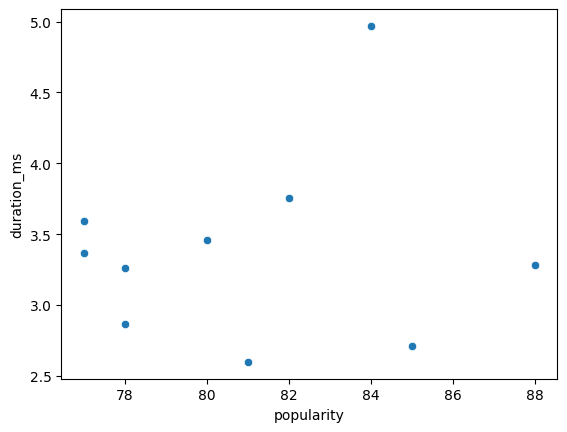

In [29]:
import seaborn as sns
scatter_plot=sns.scatterplot(data=tracks_df,x='popularity',y='duration_ms')
fig=scatter_plot.get_figure()
fig.savefig('scatter_plot.png')